In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [222]:
ts = pd.read_csv("../data/uppsala hourly/data0.csv", parse_dates=['timestamp'], index_col='timestamp')['Lufttemperatur'].resample('d').mean()

In [223]:
ts

timestamp
1840-01-01    -7.633333
1840-01-02    -4.300000
1840-01-03    -3.733333
1840-01-04    -7.366667
1840-01-05   -14.666667
                ...    
2025-02-25     4.062500
2025-02-26     3.958333
2025-02-27     2.787500
2025-02-28     1.279167
2025-03-01    -1.514286
Freq: D, Name: Lufttemperatur, Length: 67631, dtype: float64

In [224]:
fft_results = np.fft.fft(ts)

In [225]:
np.sort(np.abs(fft_results))[-30:]

array([ 13797.57921952,  13829.6381995 ,  13829.6381995 ,  15085.12284076,
        15085.12284076,  15235.55142884,  15235.55142884,  16007.02860607,
        16007.02860607,  16310.62158209,  16310.62158209,  17918.44639266,
        17918.44639266,  18402.90215663,  18402.90215663,  23029.2447392 ,
        23029.2447392 ,  26121.32572185,  26121.32572185,  28259.79232488,
        28259.79232488,  35638.94224454,  35638.94224454,  46974.99477353,
        46974.99477353,  78920.07239811,  78920.07239811, 355849.92872369,
       355849.92872369, 415630.61868844])

In [226]:
sp.signal.find_peaks(np.abs(fft_results), height=[400000,])

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})

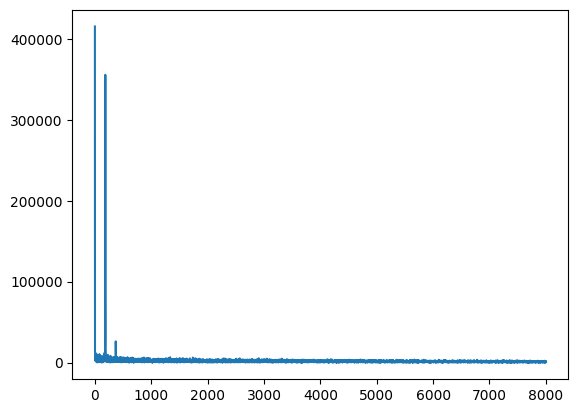

In [233]:
plt.plot(np.abs(fft_results)[:8000])

In [197]:
transformed_frequency = np.where(np.abs(fft_results) > 769488, fft_results, 0)

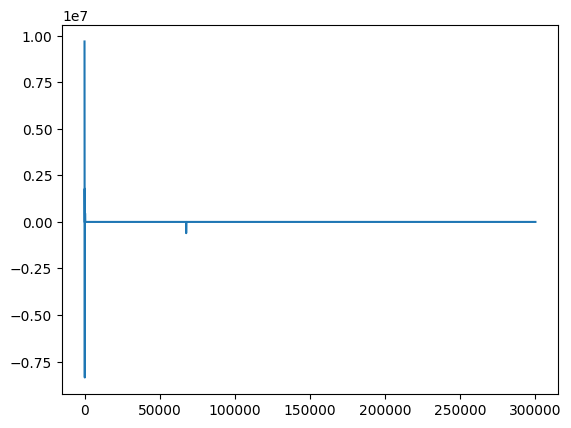

In [217]:
transformed_frequency = np.where(np.abs(fft_results) > 600000, fft_results, 0)
plt.plot(transformed_frequency[:300000])

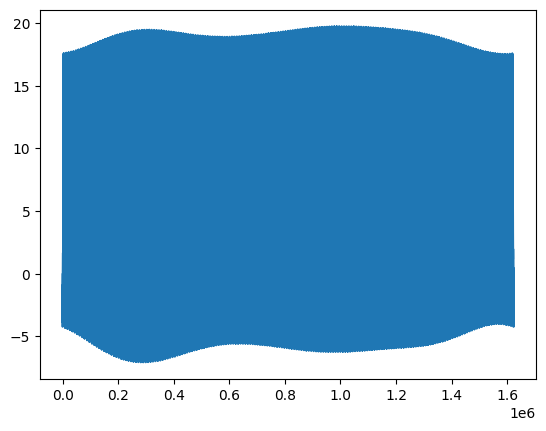

In [218]:
# ts['1986':].plot()
plt.plot(np.fft.ifft(transformed_frequency))

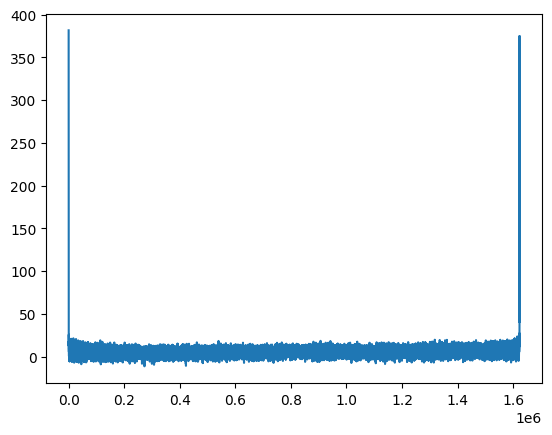

In [140]:
# ts['1986':].plot()
plt.plot(np.fft.ifft(np.where(fft_results > 1000, fft_results, 0)))
# plt.plot(ts.reset_index(drop=True))

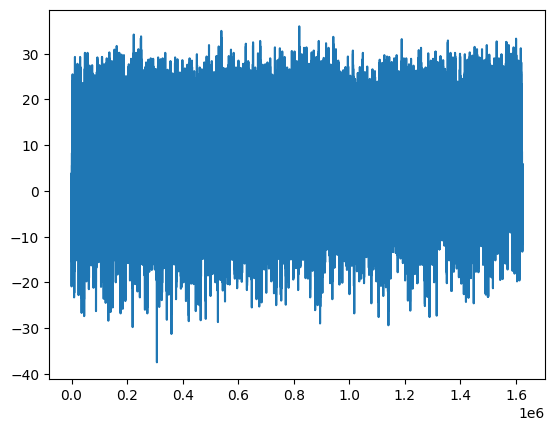

In [137]:
plt.plot(ts.reset_index(drop=True))